# **Top Spotify Songs in 2010-2019**

Group 9: Luyang Xu (lxu256@wisc.edu), Yuanru Gao (ygao277@wisc.edu)

**Using the data of the top songs from 2010 to 2019 in the world by Spotify. This dataset has several variables about the songs and is based on Billboard. We download the data of csv version from Kaggle (https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year) and name it “Spotify.csv”.** 

# Table of Contents

<hr>

1. [About the dataset](#0)<br>
2. [Analysis](#2)<br>
    1. [Genre](#3)<br>
        1. [The Top Genres in 2010-2019](#4)<br>
        2. [The Top5 Genres in Each Year](#5)<br>
        3. [Features of Top10 Genres](#7)<br>
        4. [Popularity of Top 20 Genres](#8)<br>
    2. [Artist](#9)<br>
        1. [Top20 Artists in 2010-2019](#10)<br>
        2. [Top5 Artists in Each Year](#11)<br>
    3. [Song](#12) <br>
    4. [Descriptive Variables](#18)<br>
3. [What affects the popularity of the song？](#13) <br>
    1. [How does the fame or singer influent the popularity of the song? ](#19) <br> 
    2. [OLS Regression](#14) <br>
    3. [LASSO Regression](#16) <br> 
    4. [Regression Tree](#17) <br>
    5. [Principal components analysis (PCA)](#20)<br>
<hr>

# About the dataset: <a id="0"></a>
* Genre - the genre of the track 
* Year - the release year of the recording.  
* Beats Per Minute (BPM) - The tempo of the song.  
* Energy - The energy of a song - the higher the value, the more energtic song.  
* Danceability - The higher the value, the easier it is to dance to this song.  
* Loudness (dB) - The higher the value, the louder the song.  
* Liveness - The higher the value, the more likely the song is a live recording.  
* Valence - The higher the value, the more positive mood for the song.  
* Length - The duration of the song.  
* Acousticness - The higher the value the more acoustic the song is.  
* Speechiness - The higher the value the more spoken word the song contains.  
* **Popularity - The higher the value the more popular the song is.**   

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
# conda install -c conda-forge squarify
import squarify as sq
import matplotlib.pyplot as plt   

data = pd.read_csv("Spotify.csv",encoding='ISO-8859-1')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.rename(columns={'title':'song', 'artist':'artist', 'top genre':'genre', 'year':'year', 'bpm':'beats_per_minute','nrgy':'energy',
                    'dnce':'danceability','dB':'loudness','live':'liveness', 'val':'valence', 'dur':'length', 'acous':'acousticness',
                    'spch':'speechiness','pop':'popularity'}, inplace=True)
data.head()
data.shape

(602, 14)

In [2]:
data.dtypes

song                object
artist              object
genre               object
year                 int64
beats_per_minute     int64
energy               int64
danceability         int64
loudness             int64
liveness             int64
valence              int64
length               int64
acousticness         int64
speechiness          int64
popularity           int64
dtype: object

In [3]:
data.describe()

,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,2014.589701,118.742525,70.621262,64.486711,-5.488372,17.803987,52.312292,224.671096,14.350498,8.372093,66.631229
std,2.608592,24.339497,16.068471,13.129357,1.704657,13.093347,22.430640,34.158310,20.775203,7.481608,14.273775
min,2010.000000,43.000000,4.000000,23.000000,-15.000000,2.000000,4.000000,134.000000,0.000000,3.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,220.500000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.750000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


# Analysis  <a id="2"></a>

## Genre <a id="3"></a>

### The Top Genres in 2010-2019 <a id="4"></a>

*Note: In this project, we define top as the number of songs, not the value of popularity.*

In [4]:
print('The total number of popular genres is: {}.'.format(data['genre'].nunique()))

The total number of popular genres is: 50.


In [5]:
genre_9 = data['genre'].value_counts().head(9)

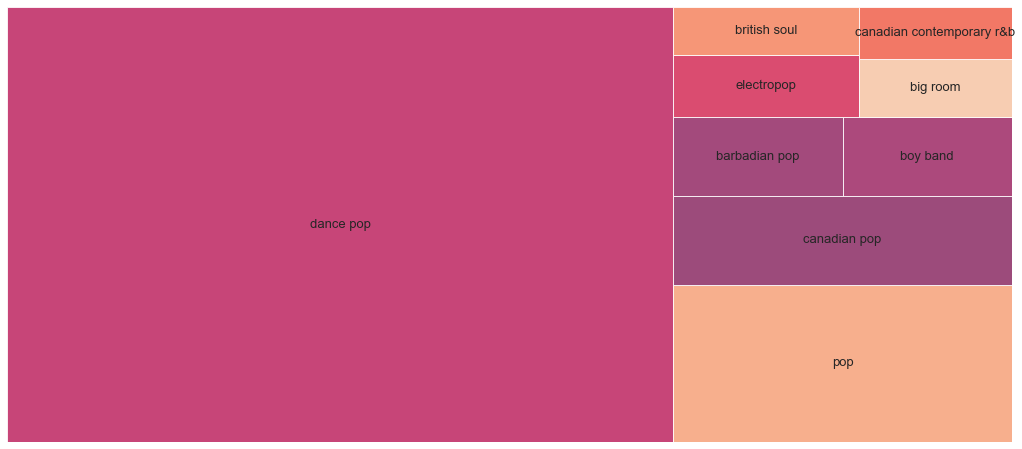

In [6]:
# Top 9 genres
sns.set(font_scale=1)
plt.rc('font',size=13)
plt.figure(figsize=(18,8))
sq.plot(sizes=genre_9, label=genre_9.index, alpha=.8)
plt.axis('off')
plt.show()

### The Top5 Genres in Each Year <a id="5"></a>

In [7]:
# Define a function to count songs of each genre in a certain year and output the five most popular genres.
def genres(y):
    genres = data[data['year']==y]['genre'].value_counts().head(5)
    genres = pd.DataFrame(genres.index).transpose()
    genres = genres.rename(columns={0:'Top1',1:'Top2',2:'Top3',3:'Top4',4:'Top5'})
    genres = genres.rename(index={0:y})
    return genres

genres_year = [genres(y) for y in list(range(2010,2020))]
result = pd.concat(genres_year)
result = result.reset_index().rename(columns = {'index':'Year'})
result = result.set_index('Year')
result

,Top1,Top2,Top3,Top4,Top5
Year,,,,,
2010,dance pop,pop,hip pop,atl hip hop,australian pop
2011,dance pop,pop,barbadian pop,british soul,atl hip hop
2012,dance pop,pop,barbadian pop,canadian pop,boy band
2013,dance pop,boy band,pop,electro,canadian pop
2014,dance pop,pop,neo mellow,colombian pop,australian hip hop
2015,dance pop,canadian pop,pop,boy band,canadian contemporary r&b
2016,dance pop,canadian pop,electropop,british soul,canadian contemporary r&b
2017,dance pop,pop,electropop,canadian pop,art pop
2018,dance pop,pop,canadian pop,hip hop,edm


### Features of Top10 Genres <a id="7"></a>

In [8]:
genre_10 = data['genre'].value_counts().head(10)
top_10_g = genre_10.index.tolist()
data_f = data[['genre','beats_per_minute','energy','danceability','loudness','liveness','valence','length','acousticness','speechiness','popularity']]
features_10 = data_f[data_f['genre'].isin(top_10_g)].groupby('genre').mean()
features_10

,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
genre,,,,,,,,,,
barbadian pop,125.333333,68.466667,62.066667,-5.000000,17.733333,51.866667,232.000000,14.400000,7.266667,65.400000
big room,122.300000,77.200000,60.900000,-4.900000,15.600000,41.000000,209.900000,10.200000,4.600000,65.600000
boy band,116.133333,80.266667,63.800000,-4.266667,15.200000,60.600000,204.733333,10.800000,7.200000,69.666667
british soul,128.400000,56.200000,58.000000,-5.900000,13.700000,38.500000,258.100000,36.300000,4.800000,68.400000
canadian contemporary r&b,127.000000,64.777778,54.555556,-6.333333,10.333333,34.111111,226.555556,16.111111,13.444444,77.666667
canadian pop,121.500000,68.117647,63.735294,-6.088235,16.441176,56.382353,207.764706,19.941176,9.794118,72.235294
dance pop,118.486239,72.825688,65.972477,-5.220183,18.816514,54.706422,224.608563,10.773700,8.899083,64.363914
electropop,112.846154,65.230769,64.692308,-6.846154,16.230769,43.923077,212.615385,14.153846,6.615385,77.461538
neo mellow,109.111111,40.666667,52.777778,-8.111111,11.777778,35.666667,230.555556,58.888889,3.555556,60.000000


### Popularity of Top 20 Genres <a id="8"></a>

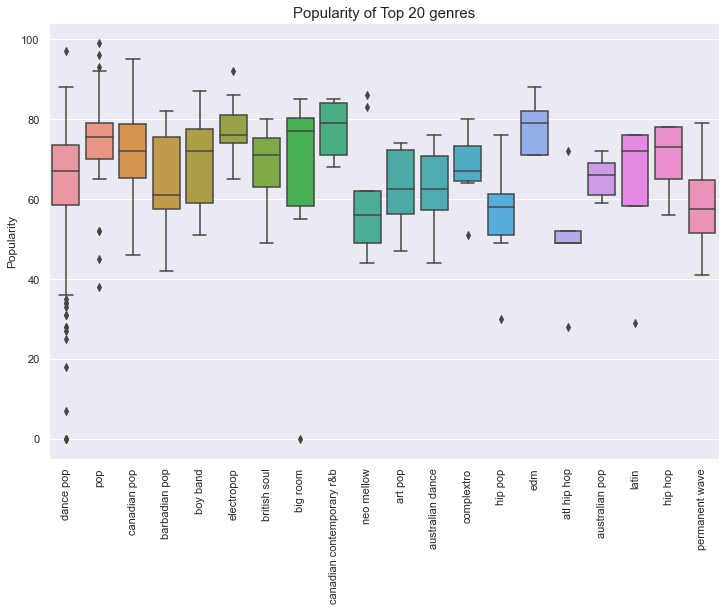

In [9]:
genre_20 = data['genre'].value_counts().head(20)

data_genre20 = data.set_index('genre')
data_genre20 =  data_genre20.loc[list(genre_20.index)]

plt.figure(figsize=(12,8))
sns.boxplot(x=data_genre20.index, y="popularity", data=data_genre20)
plt.ylabel('Popularity', fontsize=12)
plt.xlabel('')
plt.xticks(rotation='vertical')
plt.title("Popularity of Top 20 genres", fontsize=15)
plt.rc('font', size=20)
sns.despine()
plt.show()

## Artist <a id="9"></a>

### Top20 Artists in 2010-2019 <a id="10"></a>

In [10]:
print('The total number of popular artists is: {}.'.format(data['artist'].nunique()))

The total number of popular artists is: 184.


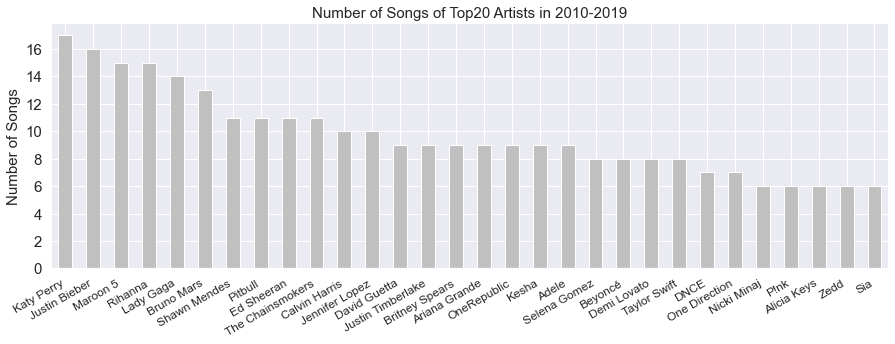

In [11]:
fig, ax = plt.subplots(figsize=(15,5))
data['artist'].value_counts().head(30).plot.bar(color='silver')
ax.grid(axis='y', color='white')
fig.autofmt_xdate()
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
ax.set_title('Number of Songs of Top20 Artists in 2010-2019',fontsize=15)
ax.set_ylabel('Number of Songs',fontsize=15)
sns.despine()

### Top5 Artists in Each Year <a id="11"></a>

In [12]:
# Define a function to count songs of each genre in a certain year and output the five most popular genres.
def artists(y):
    artists = data[data['year']==y]['artist'].value_counts().head(5)
    artists = pd.DataFrame(artists.index).transpose()
    artists = artists.rename(columns={0:'Top1',1:'Top2',2:'Top3',3:'Top4',4:'Top5'})
    artists = artists.rename(index={0:y})
    return artists

artists_year = [artists(y) for y in list(range(2010,2020))]
result = pd.concat(artists_year)
result = result.reset_index().rename(columns = {'index':'Year'})
result = result.set_index('Year')
result

,Top1,Top2,Top3,Top4,Top5
Year,,,,,
2010,The Black Eyed Peas,Christina Aguilera,Kesha,Alicia Keys,Lady Gaga
2011,Lady Gaga,Beyoncé,Jennifer Lopez,Rihanna,Nicki Minaj
2012,Rihanna,Katy Perry,Maroon 5,fun.,Bruno Mars
2013,Justin Timberlake,One Direction,Emeli Sandé,Little Mix,Demi Lovato
2014,Birdy,Katy Perry,Bruno Mars,Beyoncé,Pharrell Williams
2015,Justin Bieber,Ed Sheeran,Pitbull,Ariana Grande,David Guetta
2016,Adele,The Chainsmokers,Shawn Mendes,Britney Spears,DNCE
2017,The Chainsmokers,DNCE,Katy Perry,Lana Del Rey,Pitbull
2018,Shawn Mendes,Dua Lipa,Taylor Swift,Justin Timberlake,Maroon 5


## Song <a id="12"></a>

In [13]:
from wordcloud import WordCloud

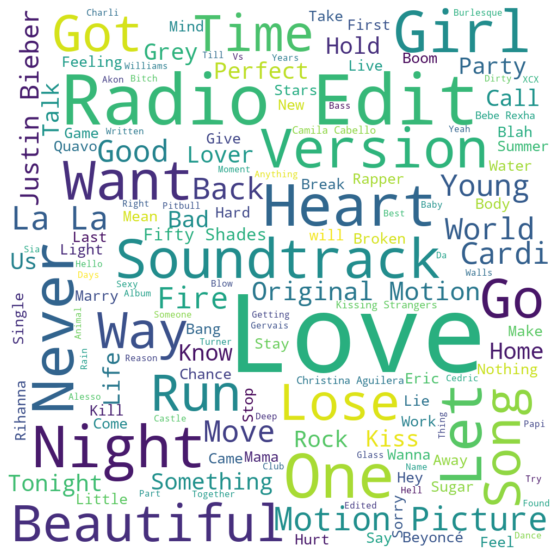

In [14]:
# delete the words feat and remix which can not reflect the artist's preference when naming the song. 
def remove_feat(x):
    for i in x:
        if 'feat'in x:
            x = x.replace('feat','')
        else:
            x = x
    return x

def remove_remix(x):
    for i in x:
        if 'Remix'in x:
            x = x.replace('Remix','')
        else:
            x = x
    return x
name_cleaned = data['song'].map(remove_feat).map(remove_remix)

wordcloud = WordCloud(width = 1000, height = 1000, max_font_size = 200, max_words = 150,
                      background_color='white').generate(" ".join(name_cleaned))

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

## Descriptive Variables <a id="18"></a>

In [15]:
data_quan=data[['beats_per_minute','energy','danceability','loudness','liveness','valence','length','acousticness','speechiness','popularity']]

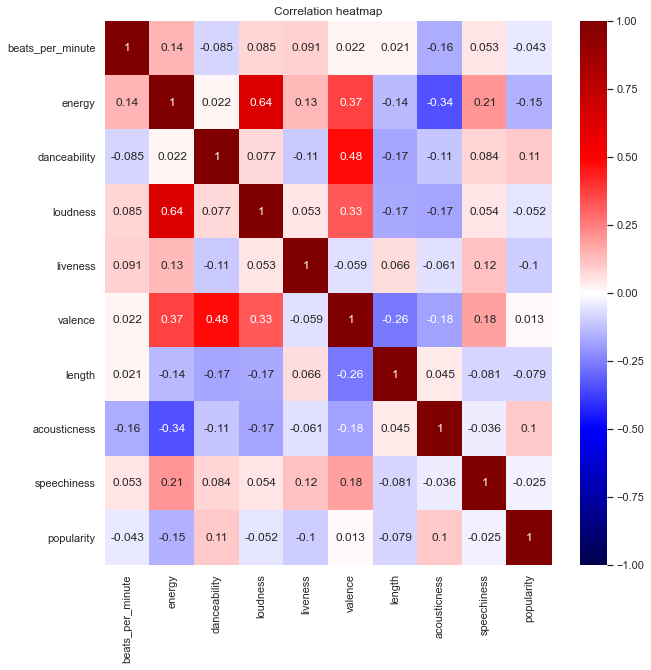

In [16]:
# heatmap of the correlation 
sns.set(font_scale=1)
plt.rc('font',size=10)
correlation=data_quan.corr(method='spearman')
plt.figure(figsize=(10,10))
plt.title('Correlation heatmap')
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap="seismic",center=0,
            annot_kws={'size':12,'weight':'normal'})
plt.show()

**From the heatmap above, we can find some relatively significant linear relationships:**

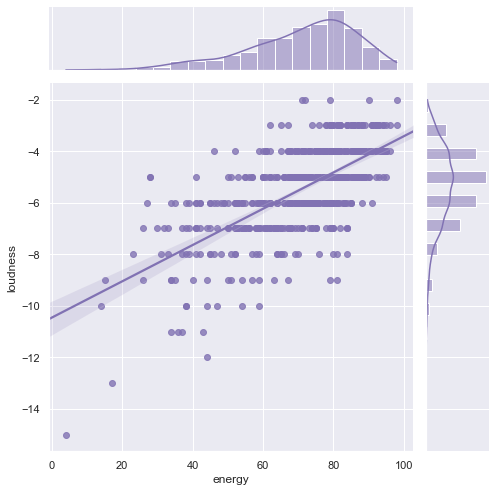

In [17]:
#(1) energy & loudness
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="energy", y="loudness", data=data,
                  kind="reg", truncate=False,
                  color="m", height=7)

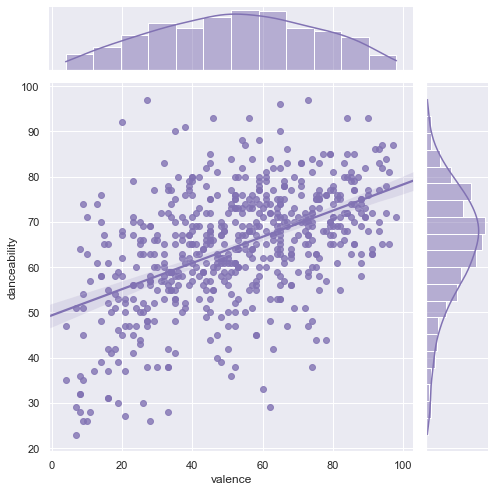

In [18]:
#(2) valence & danceability
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="valence", y="danceability", data=data,
                  kind="reg", truncate=False,
                  color="m", height=7)

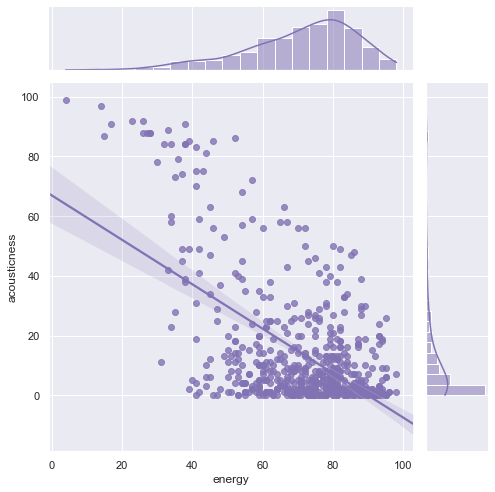

In [19]:
#(3) energy & acousticness
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="energy", y="acousticness", data=data,
                  kind="reg", truncate=False,
                  color="m", height=7)

# What affects the popularity of the song？<a id="13"></a>

## How does the fame of singer influent the popularity of the song? <a id="19"></a>

**We select the data for 2019 and add the indicator "follower". "Follower" refers to the number of followers of each singer on Spotify. It can largely reflect the singer's reputation and influence. We will use this data to study the influence of a singer's reputation on the popularity of his work.**

In [20]:
data_2019 = pd.read_csv("Spotify_2019.csv")
data_2019.drop('Unnamed: 0', axis=1, inplace=True)
data_2019.columns

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity', 'Followers'],
      dtype='object')

In [21]:
data_2019.rename(columns={'Track.Name':'Track.Name', 'Artist.Name':'artist', 'Genre':'genre', 'year':'year', 'Beats.Per.Minute':'beats_per_minute','Energy':'energy',
                    'Danceability':'danceability','Loudness..dB..':'loudness','Liveness':'liveness', 'Valence.':'valence', 'Length.':'length', 'Acousticness..':'acousticness',
                    'Speechiness.':'speechiness','Popularity':'popularity'}, inplace=True)
data_2019.head()

,Track.Name,artist,genre,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity,Followers
0,Se�orita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,90.392
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,83.914
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,180.847
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,255.770
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,199.112



<b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, Simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

In [22]:
import patsy
import statsmodels.api as sm           
import statsmodels.formula.api as smf  
from statsmodels.iolib.summary2 import summary_col

In [23]:
res = smf.ols('popularity ~ beats_per_minute + energy + danceability + loudness + liveness + valence + length + acousticness + speechiness + Followers',
              data=data_2019).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.025
Date:                Fri, 11 Dec 2020   Prob (F-statistic):              0.441
Time:                        16:25:08   Log-Likelihood:                -139.72
No. Observations:                  50   AIC:                             301.4
Df Residuals:                      39   BIC:                             322.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           89.6255      9.719  

**In the following analysis, we will use a variety of machine learning methods to filter out factors that can relatively affect the popularity of songs.**

## OLS Regression <a id="14"></a>

In [24]:
res = smf.ols('popularity ~ beats_per_minute + energy + danceability + loudness + liveness + valence + length + acousticness + speechiness',
              data=data_quan).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     2.763
Date:                Fri, 11 Dec 2020   Prob (F-statistic):            0.00357
Time:                        16:25:08   Log-Likelihood:                -2441.7
No. Observations:                 602   AIC:                             4903.
Df Residuals:                     592   BIC:                             4947.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           89.8857      8.958  

## LASSO Regression <a id="16"></a>


<b>LASSO regression</b> (least absolute shrinkage and selection operator) considers a $L_1-norm$ penalty:
<br><br>
$$
h(\beta)=\sum^p_{j=0}|\beta_j|=||\beta||_1
$$
<br>
The lasso estimator in the $\beta$ that minimize the loss function:
<br><br>
$$
L(\beta)=\sum^n_{i=1}(y_i-(\beta_0+\beta_1x_{i1}+...+\beta_px_{ip}))^2+\lambda\sum^p_{j=0}|\beta_j|
$$
<p></p>

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model                         
from sklearn.preprocessing import StandardScaler   
import statsmodels.formula.api as smf  

In [26]:
var = ['beats_per_minute','energy','danceability',
            'loudness','liveness','valence','length',
            'acousticness','speechiness']

In [27]:
# Standardize variables
X = StandardScaler().fit_transform(data[var])
# Use cross validation to find the best lambda for Lasso Regression
lasso = linear_model.LassoCV(cv=10).fit(X, data['popularity'])
print('The best lambda for LASSO Regression = {0}.'.format(lasso.alpha_))

The best lambda for LASSO Regression = 0.42936352199387673.


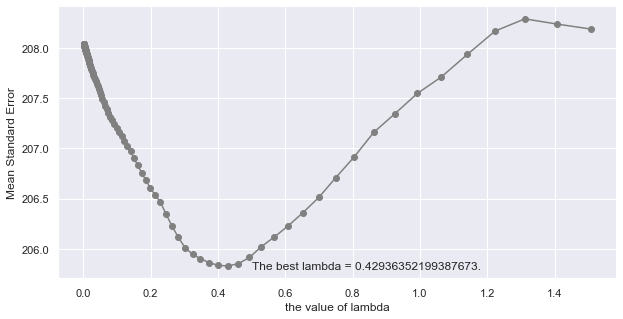

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lasso.alphas_, lasso.mse_path_.mean(axis=1), marker='o', color='grey')

ax.set_ylabel('Mean Standard Error')
ax.set_xlabel('the value of lambda')

ax.text(0.5,205.8,'The best lambda = {0}.'.format(lasso.alpha_))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [29]:
lasso_result = pd.DataFrame({'Variables':var, 'Lasso': lasso.coef_}) 
lasso_result = lasso_result.set_index('Variables')
lasso_result

,Lasso
Variables,
beats_per_minute,-0.000000
energy,-1.360396
danceability,0.669468
loudness,0.447746
liveness,-0.476409
valence,0.000000
length,-1.033246
acousticness,-0.000000
speechiness,-0.000000


In [30]:
res_LASSO = smf.ols('popularity ~ energy + danceability + loudness + liveness + length' ,
              data=data_quan).fit()
print(res_LASSO.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     4.893
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           0.000214
Time:                        16:25:11   Log-Likelihood:                -2442.0
No. Observations:                 602   AIC:                             4896.
Df Residuals:                     596   BIC:                             4922.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       88.2009      7.368     11.971   

**The variables selected by LASSO regression: energy, danceability, loudness, liveness, length;**

**Use the above variables as independent variables to perform OLS regression. The variables that have a significant impact on popularity are: energy (negaitve)，loudness (positive)，length (negative) .**

## Regression Tree <a id="17"></a>

<b>Regression Tree </b> divides the predictor space—that is, the set of possible values for $X_1$, $X_2$,..., $X_p$ —into J distinct and non-overlapping regions, $R_1$, $R_2$,..., $R_J$. The goal is to ﬁnd boxes $R_1$, ..., $R_J$ that minimize the RSS, given by
<br><br> 

$$
\sum^J_{j=1}\sum_{j \in R_j}(y_i-\hat{y}_{R_j})^2
$$
    
where $\hat{y}_{R_j}$ is the mean response for the observations within the jth box.  
   
Through the pruning of the regression tree, the effect of screening variables can also be achieved.
<p></p>

In [31]:
data.head(2)

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# conda install -c conda-forge pydotplus
import pydotplus

In [33]:
features=data[['beats_per_minute','energy','danceability','loudness','liveness','valence','length','acousticness','speechiness']]
target=data['popularity']

In [34]:
from sklearn.model_selection import train_test_split
train_feature,test_feature,train_targets,test_targets=train_test_split(features,target,test_size=0.2,random_state=42)

In [35]:
from sklearn.tree import DecisionTreeClassifier 

In [36]:
model=DecisionTreeClassifier(max_depth=3, random_state=0) 
model.fit(train_feature,train_targets)
model.predict(test_feature) 

array([72, 72, 72, 72, 72, 72, 72, 36, 72, 57, 72, 72, 58, 72, 72, 72, 72,
       72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72,
       72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72,
       72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 36, 72, 72, 72, 72, 72,
       72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72,
       72, 72, 72, 72, 80, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72,
       72, 72, 72, 72, 72, 72, 77, 72, 72, 72, 72, 72, 80, 72, 72, 72, 72,
       72, 57])

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(test_targets.values.flatten(),model.predict(test_feature))

0.01652892561983471

In [38]:
fea_names = list(features.columns.values)
features_list = pd.DataFrame({'features':['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8'],
             'variables':fea_names}).set_index('features')

In [39]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 81.50
|   |--- feature_7 <= 3.00
|   |   |--- feature_5 <= 65.50
|   |   |   |--- class: 57
|   |   |--- feature_5 >  65.50
|   |   |   |--- class: 58
|   |--- feature_7 >  3.00
|   |   |--- feature_6 <= 324.50
|   |   |   |--- class: 77
|   |   |--- feature_6 >  324.50
|   |   |   |--- class: 49
|--- feature_0 >  81.50
|   |--- feature_3 <= -10.50
|   |   |--- feature_7 <= 13.00
|   |   |   |--- class: 65
|   |   |--- feature_7 >  13.00
|   |   |   |--- class: 36
|   |--- feature_3 >  -10.50
|   |   |--- feature_1 <= 33.50
|   |   |   |--- class: 80
|   |   |--- feature_1 >  33.50
|   |   |   |--- class: 72



In [40]:
features_tree = features_list.loc[['feature_0','feature_7','feature_3','feature_1','feature_5','feature_6']]
features_tree

,variables
features,
feature_0,beats_per_minute
feature_7,acousticness
feature_3,loudness
feature_1,energy
feature_5,valence
feature_6,length


In [41]:
res_Tree = smf.ols('popularity ~ beats_per_minute + energy + loudness + valence + length + acousticness' ,
              data=data_quan).fit()
print(res_Tree.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     3.538
Date:                Fri, 11 Dec 2020   Prob (F-statistic):            0.00189
Time:                        16:25:17   Log-Likelihood:                -2443.5
No. Observations:                 602   AIC:                             4901.
Df Residuals:                     595   BIC:                             4932.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           97.0063      7.790  

**The variables selected by Regression Tree: beats_per_minute, energy, loudness, valence, length, acousticness;**

**Use the above variables as independent variables to perform OLS regression. The variables that have a significant impact on popularity are: energy (negaitve)，loudness (positive)，length (negative) .**

## Principal components analysis (PCA)<a id="20"></a>

<b>Principal components analysis (PCA)</b> is a popular approach for deriving a low-dimensional set of features from a large set of variables.
    
Given a set of features $X_1$, $X_2$,..., $X_p$, principal components are independent and linear combinations of features.

• The ﬁrst component is $Z_1$ = $\phi_{11}X_1$ + $\phi_{21}X_2$ + · · · + $\phi_{p1}X_p$, which has the largest variance.

• The second component is $Z_2$ = $\phi_{12}X_1$ + $\phi_{22}X_2$ + · · · + $\phi_{p2}X_p$, which is independent of $Z_1$, and has the second largest variance.
    
Since it is often the case that the signal in a data set is concentrated in its ﬁrst few principal components, PCA can lead to less noisy results. Thus we can use PCA to select some representative variables.
<br><br>
<p></p>


In [42]:
data_names = data_quan.columns

In [43]:
from sklearn.decomposition import PCA

In [44]:
scaler = StandardScaler() 
scaler.fit(data_quan) 
X_scaled = scaler.transform(data_quan)

In [45]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled) 
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (602, 10)
Reduced shape: (602, 2)


In [46]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[-0.05352856 -0.51885295 -0.30028094 -0.45654854 -0.09308948 -0.43234038
   0.22013731  0.42830469 -0.04267036  0.00333772]
 [ 0.36100237  0.25335331 -0.45463933  0.0990226   0.44632253 -0.23698904
   0.34313931 -0.15023596  0.26894424 -0.34781167]]


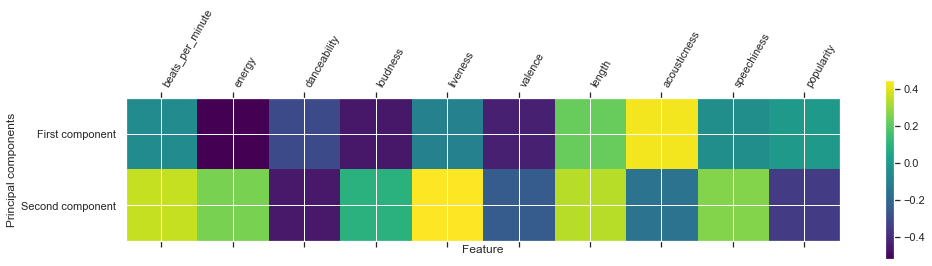

In [47]:
plt.matshow(pca.components_, cmap='viridis') 
plt.yticks([0, 1], ["First component", "Second component"]) 
plt.colorbar() 
plt.xticks(range(len(data_names)),data_names, rotation=60, ha='left')

plt.xlabel("Feature") 
plt.ylabel("Principal components")
plt.show()

In [48]:
res_PCA = smf.ols('popularity ~ beats_per_minute + energy +danceability + loudness + valence +acousticness' ,
              data=data_quan).fit()
print(res_PCA.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.901
Date:                Fri, 11 Dec 2020   Prob (F-statistic):            0.00853
Time:                        16:25:22   Log-Likelihood:                -2445.4
No. Observations:                 602   AIC:                             4905.
Df Residuals:                     595   BIC:                             4936.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           80.0482      7.770  

**The variables selected by PCA: beats_per_minute, energy, danceability, loudness, valence,acousticness;**

**Use the above variables as independent variables to perform OLS regression. The variables that have a significant impact on popularity are: energy (negaitve)，loudness (positive).**

## <h3 align="center"> Thank you! <h3/>